In [1]:
import pandas as pd
import os

Merging 12 Months of data

In [3]:
file_path= r'C:\Users\Shoaib khan\Desktop\Rsales_data'
files = [file for file in os.listdir(file_path) if file.endswith('.csv')]
all_month_data= pd.DataFrame()
for file in files:
    df = pd.read_csv(os.path.join(file_path, file))
    all_month_data= pd.concat([all_month_data,df],)
all_month_data.to_csv('all_data.csv', index = False)

Read inupdated dataframe

In [4]:
all_data= pd.read_csv('all_data.csv')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


### Cleaning the data

#### 1. Drop Rows of NAN

In [5]:
nan_values = all_data[all_data.isnull().any(axis=1)]
nan_values.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1,NaN,NaN,NaN,NaN,NaN,NaN
356,NaN,NaN,NaN,NaN,NaN,NaN
735,NaN,NaN,NaN,NaN,NaN,NaN
1433,NaN,NaN,NaN,NaN,NaN,NaN
1553,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
all_data= all_data.dropna(how = 'all')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


##### Finding and Removing the or 

In [7]:
all_data= all_data[all_data['Order Date'].str[0:2]!='Or']
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


##### Converting the str types column values to correct type for analysis

In [8]:
all_data['Price Each']= pd.to_numeric(all_data['Price Each'])
all_data['Quantity Ordered']= pd.to_numeric(all_data['Quantity Ordered'])
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


### Agument Data with additional columns

#### 1.Adding the month column

In [9]:
all_data['Month']= all_data['Order Date'].str[0:2]
all_data['Month']= all_data['Month'].astype('int32')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


### Q1. In which Month the sale was maximum?

##### Adding another column for answer

In [10]:
all_data['Sales'] = all_data['Quantity Ordered'] * all_data['Price Each']
all_data.head(3)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00


In [11]:
all_data = all_data[['Order ID', 'Product', 'Quantity Ordered','Price Each','Sales','Order Date', 'Purchase Address','Month']]
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,23.90,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600.00,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


In [12]:
s=all_data.groupby('Month').sum()['Sales']
print(s)

Month
1     1822256.73
2     2202022.42
3     2807100.38
4     3390670.24
5     3152606.75
6     2577802.26
7     2647775.76
8     2244467.88
9     2097560.13
10    3736726.88
11    3199603.20
12    4613443.34
Name: Sales, dtype: float64


In [13]:
s.max()

4613443.34

In [14]:
s.index.max()

12

In [15]:
# Assuming 's' is your Series
s_sorted = s.sort_values(ascending=False)

# Print the sorted Series
print(s_sorted)

Month
12    4613443.34
10    3736726.88
4     3390670.24
11    3199603.20
5     3152606.75
3     2807100.38
7     2647775.76
6     2577802.26
8     2244467.88
2     2202022.42
9     2097560.13
1     1822256.73
Name: Sales, dtype: float64


In [16]:
import matplotlib.pyplot as plt 
%matplotlib inline

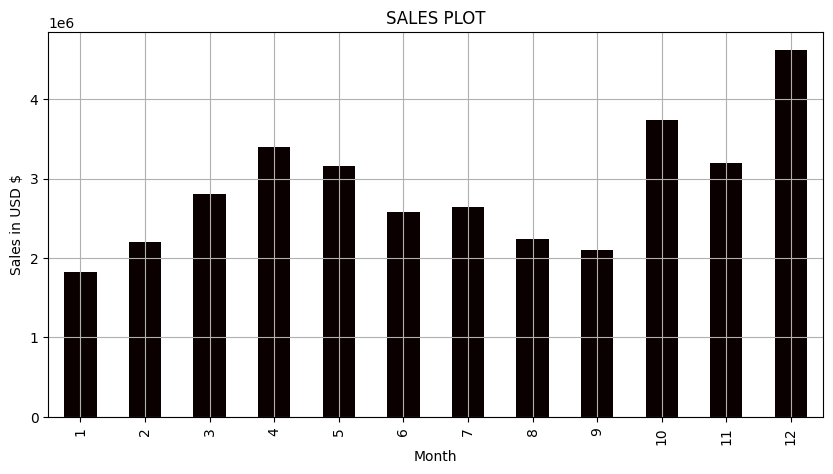

In [18]:
plt.xlabel('Months')
plt.ylabel('Sales in USD \$')
plt.title('SALES PLOT')
s.plot(kind= 'bar', x= 'Month', y = 'Sales',colormap= 'hot', figsize=(10,5))
plt.grid();

### Q2. What city has the highest number of sales ?

##### Creating the city column 

In [19]:
all_data['City']= all_data['Purchase Address'].str.split(',').str.get(1)
all_data['City'] = all_data['City'].str.strip()
all_data.head(10)

,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Purchase Address,Month,City
0,176558,USB-C Charging Cable,2,11.95,23.90,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,Dallas
2,176559,Bose SoundSport Headphones,1,99.99,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,Boston
3,176560,Google Phone,1,600.00,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles
4,176560,Wired Headphones,1,11.99,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles
5,176561,Wired Headphones,1,11.99,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,Los Angeles
6,176562,USB-C Charging Cable,1,11.95,11.95,04/29/19 13:03,"381 Wilson St, San Francisco, CA 94016",4,San Francisco
7,176563,Bose SoundSport Headphones,1,99.99,99.99,04/02/19 07:46,"668 Center St, Seattle, WA 98101",4,Seattle
8,176564,USB-C Charging Cable,1,11.95,11.95,04/12/19 10:58,"790 Ridge St, Atlanta, GA 30301",4,Atlanta
9,176565,Macbook Pro Laptop,1,1700.00,1700.00,04/24/19 10:38,"915 Willow St, San Francisco, CA 94016",4,San Francisco
10,176566,Wired Headphones,1,11.99,11.99,04/08/19 14:05,"83 7th St, Boston, MA 02215",4,Boston


In [20]:
city_sales= all_data.groupby('City')['Sales'].sum().reset_index()
print(city_sales)

            City       Sales
0        Atlanta  2795498.58
1         Austin  1819581.75
2         Boston  3661642.01
3         Dallas  2767975.40
4    Los Angeles  5452570.80
5  New York City  4664317.43
6       Portland  2320490.61
7  San Francisco  8262203.91
8        Seattle  2747755.48


In [21]:
city_sales.head()

,City,Sales
0,Atlanta,2795498.58
1,Austin,1819581.75
2,Boston,3661642.01
3,Dallas,2767975.40
4,Los Angeles,5452570.80


In [22]:
city_sales_sorted = city_sales.sort_values(by= 'Sales',ascending=False)
city_sales_sorted

,City,Sales
7,San Francisco,8262203.91
4,Los Angeles,5452570.80
5,New York City,4664317.43
2,Boston,3661642.01
0,Atlanta,2795498.58
3,Dallas,2767975.40
8,Seattle,2747755.48
6,Portland,2320490.61
1,Austin,1819581.75


##### San Francisco has most number of sales

Text(0, 0.5, 'Sales')

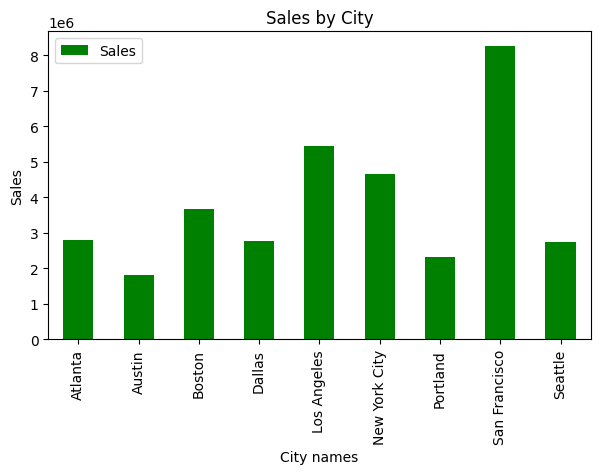

In [23]:
city_sales.plot(kind='bar',x= 'City', y = 'Sales',color='g', figsize=(7,4))
plt.title('Sales by City')
plt.xlabel('City names')
plt.ylabel('Sales')

### Q3. What time should we display advertisments to maximize likelihod of customer's buying products?

all_data['Order Date'] = pd.to_datetime(all_data['Order Date'])
all_data.head()

##### Extracting time from Order date Coulmn

In [27]:
# Convert 'Order Date' to datetime format
all_data['Order Date'] = pd.to_datetime(all_data['Order Date'])

all_data['Order Timing'] = all_data['Order Date'].dt.strftime('%H:%M:%S')

# Display the first few rows
all_data.head()


C:\Windows\Temp\ipykernel_21500\162119936.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  all_data['Order Date'] = pd.to_datetime(all_data['Order Date'])


,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Purchase Address,Month,City,Hour,Order Timing
0,176558,USB-C Charging Cable,2,11.95,23.90,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,Dallas,8,08:46:00
2,176559,Bose SoundSport Headphones,1,99.99,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,Boston,22,22:30:00
3,176560,Google Phone,1,600.00,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles,14,14:38:00
4,176560,Wired Headphones,1,11.99,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles,14,14:38:00
5,176561,Wired Headphones,1,11.99,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,Los Angeles,9,09:27:00


In [28]:
all_data['Hour'] = pd.to_datetime(all_data['Order Date']).dt.hour
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Purchase Address,Month,City,Hour,Order Timing
0,176558,USB-C Charging Cable,2,11.95,23.90,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,Dallas,8,08:46:00
2,176559,Bose SoundSport Headphones,1,99.99,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,Boston,22,22:30:00
3,176560,Google Phone,1,600.00,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles,14,14:38:00
4,176560,Wired Headphones,1,11.99,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles,14,14:38:00
5,176561,Wired Headphones,1,11.99,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,Los Angeles,9,09:27:00


In [29]:
time_sales= all_data.groupby('Order Timing')['Sales'].sum().reset_index()
time_sales.head()

,Order Timing,Sales
0,00:00:00,22488.86
1,00:01:00,12814.95
2,00:02:00,12951.64
3,00:03:00,18759.14
4,00:04:00,16960.08


In [30]:
time_sales_sorted= time_sales.sort_values(by = 'Sales', ascending=False)
time_sales_sorted.head()

,Order Timing,Sales
1141,19:01:00,54503.14
741,12:21:00,54181.96
1156,19:16:00,54156.39
1213,20:13:00,53149.51
1160,19:20:00,52903.41


In [31]:
hour_sales= all_data.groupby('Hour')['Sales'].sum().reset_index()
hour_sales.head()

,Hour,Sales
0,0,713721.27
1,1,460866.88
2,2,234851.44
3,3,145757.89
4,4,162661.01


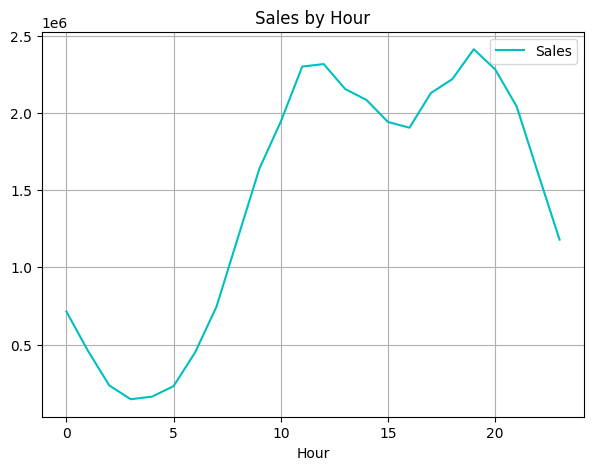

In [133]:
hour_sales.plot(kind='line', x= 'Hour', y='Sales',color ='c', figsize=(7,5))
plt.grid()
plt.title('Sales by Hour');

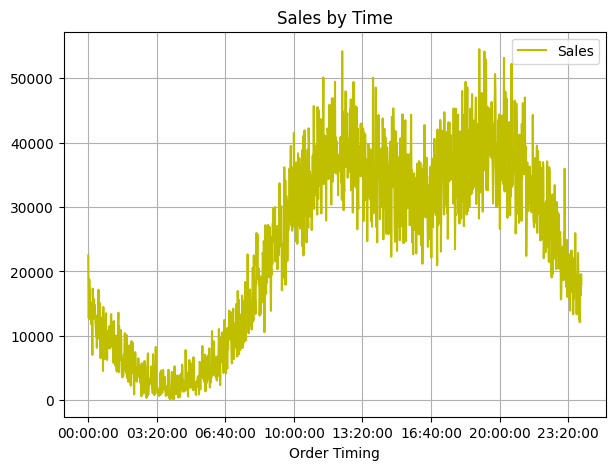

In [32]:
time_sales.plot(kind='line', x= 'Order Timing', y='Sales',color ='y', figsize=(7,5))
plt.grid()
plt.title('Sales by Time');

#### In morning around 10Am and in Evening around 6 pm is Good time to advertise .

### Q4. What products are most often sold together?

In [33]:
df = all_data[all_data['Order ID'].duplicated(keep=False)]
df['Grouped']= df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))
df= df[['Order ID','Grouped']].drop_duplicates()
df.head()

C:\Windows\Temp\ipykernel_21500\290764092.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Grouped']= df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))


,Order ID,Grouped
3,176560,"Google Phone,Wired Headphones"
18,176574,"Google Phone,USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
32,176586,"AAA Batteries (4-pack),Google Phone"
119,176672,"Lightning Charging Cable,USB-C Charging Cable"


In [34]:
# Import necessary modules
from itertools import combinations
from collections import Counter

# Initialize a Counter to keep track of combinations and their frequencies
count = Counter()

# Iterate over each row in the 'Grouped' column of the DataFrame 'df'
for row in df['Grouped']:
    # Split the comma-separated values in the 'Grouped' column into a list
    row_list = row.split(',')
    
    # Update the counter with combinations of 3 items from the list
    count.update(Counter(combinations(row_list, 3)))

# Print the 10 most common combinations along with their frequencies
for key, value in count.most_common(10):
    print(key, value)


('Google Phone', 'USB-C Charging Cable', 'Wired Headphones') 87
('iPhone', 'Lightning Charging Cable', 'Wired Headphones') 62
('iPhone', 'Lightning Charging Cable', 'Apple Airpods Headphones') 47
('Google Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 35
('Vareebadd Phone', 'USB-C Charging Cable', 'Wired Headphones') 33
('iPhone', 'Apple Airpods Headphones', 'Wired Headphones') 27
('Google Phone', 'Bose SoundSport Headphones', 'Wired Headphones') 24
('Vareebadd Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 16
('USB-C Charging Cable', 'Bose SoundSport Headphones', 'Wired Headphones') 5
('Vareebadd Phone', 'Bose SoundSport Headphones', 'Wired Headphones') 5


### Q. What product sold the most? and why do you think it sold the most 

In [35]:
all_data.head(5)

,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Purchase Address,Month,City,Hour,Order Timing
0,176558,USB-C Charging Cable,2,11.95,23.90,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,Dallas,8,08:46:00
2,176559,Bose SoundSport Headphones,1,99.99,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,Boston,22,22:30:00
3,176560,Google Phone,1,600.00,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles,14,14:38:00
4,176560,Wired Headphones,1,11.99,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles,14,14:38:00
5,176561,Wired Headphones,1,11.99,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,Los Angeles,9,09:27:00


In [36]:
# creating the data frame of just product and sales 

product_sales = all_data.groupby('Product')['Quantity Ordered'].sum().reset_index()
print(product_sales)

                       Product  Quantity Ordered
0                 20in Monitor              4129
1       27in 4K Gaming Monitor              6244
2             27in FHD Monitor              7550
3       34in Ultrawide Monitor              6199
4        AA Batteries (4-pack)             27635
5       AAA Batteries (4-pack)             31017
6     Apple Airpods Headphones             15661
7   Bose SoundSport Headphones             13457
8                Flatscreen TV              4819
9                 Google Phone              5532
10                    LG Dryer               646
11          LG Washing Machine               666
12    Lightning Charging Cable             23217
13          Macbook Pro Laptop              4728
14             ThinkPad Laptop              4130
15        USB-C Charging Cable             23975
16             Vareebadd Phone              2068
17            Wired Headphones             20557
18                      iPhone              6849


In [37]:
product_sales.max

<bound method DataFrame.max of                        Product  Quantity Ordered
0                 20in Monitor              4129
1       27in 4K Gaming Monitor              6244
2             27in FHD Monitor              7550
3       34in Ultrawide Monitor              6199
4        AA Batteries (4-pack)             27635
5       AAA Batteries (4-pack)             31017
6     Apple Airpods Headphones             15661
7   Bose SoundSport Headphones             13457
8                Flatscreen TV              4819
9                 Google Phone              5532
10                    LG Dryer               646
11          LG Washing Machine               666
12    Lightning Charging Cable             23217
13          Macbook Pro Laptop              4728
14             ThinkPad Laptop              4130
15        USB-C Charging Cable             23975
16             Vareebadd Phone              2068
17            Wired Headphones             20557
18                      iPhone        

In [38]:
# Sort the 'product_sales' DataFrame by the 'Quantity Ordered' column in descending order
product_sales_sorted = product_sales.sort_values(by='Quantity Ordered', ascending=False)

# Display the sorted DataFrame
product_sales_sorted

,Product,Quantity Ordered
5,AAA Batteries (4-pack),31017
4,AA Batteries (4-pack),27635
15,USB-C Charging Cable,23975
12,Lightning Charging Cable,23217
17,Wired Headphones,20557
6,Apple Airpods Headphones,15661
7,Bose SoundSport Headphones,13457
2,27in FHD Monitor,7550
18,iPhone,6849
1,27in 4K Gaming Monitor,6244


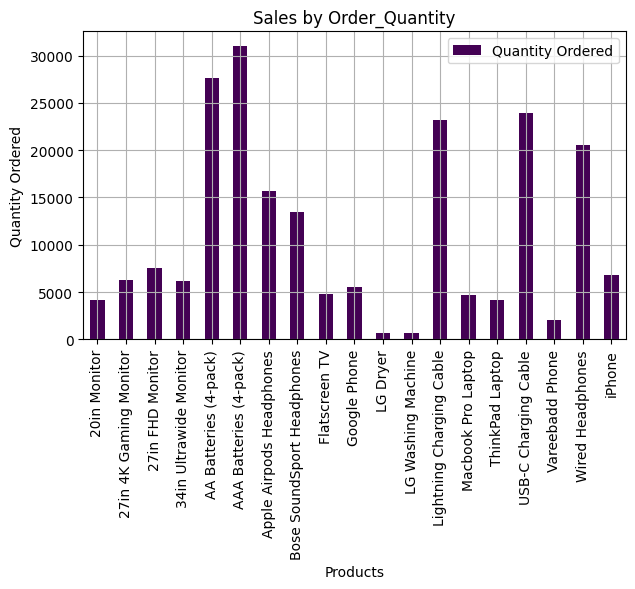

In [39]:
# Create a bar plot using the 'product_sales' DataFrame
product_sales.plot(kind='bar', x='Product', y='Quantity Ordered', colormap='viridis', figsize=(7,4))

# Set the title of the plot
plt.title('Sales by Order_Quantity')

# Set the label for the x-axis
plt.xlabel('Products')

# Set the label for the y-axis
plt.ylabel('Quantity Ordered')

# Add grid lines to the plot
plt.grid();


Text(0, 0.5, 'Quantity Ordered')

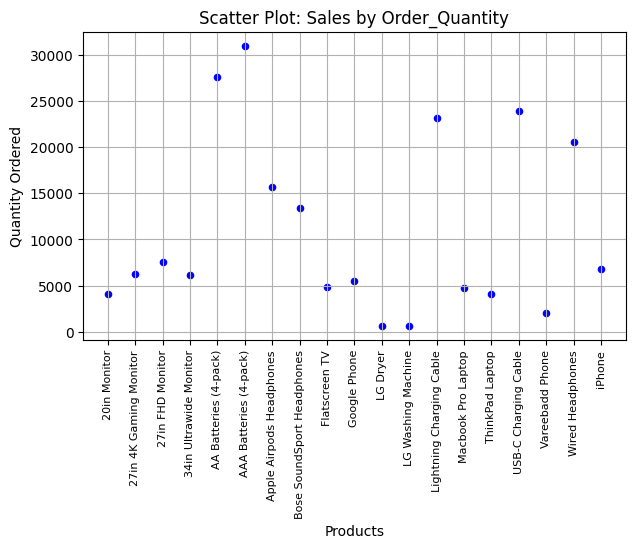

In [40]:
# Scatter plot for sales by order quantity
product_sales.plot(kind='scatter', x='Product', y='Quantity Ordered', color='b', figsize=(7, 4))

# Set the title of the scatter plot
plt.title('Scatter Plot: Sales by Order_Quantity')

# Set custom x-axis ticks with product names rotated vertically and font size 8
plt.xticks(range(len(product_sales)), product_sales['Product'], rotation='vertical', size=8)

# Add grid lines to the scatter plot
plt.grid()

# Set the label for the x-axis
plt.xlabel('Products')

# Set the label for the y-axis
plt.ylabel('Quantity Ordered')



In [41]:
# Count the number of sales
sales_count = all_data['Sales'].count()
print(sales_count)

185950


##### The most purchased product is AAA Batteries (4-pack).

In [42]:
# Count the total number of unique products in the 'Product' column
total_products = all_data['Product'].nunique()

# Print the total number of unique products
print("Total Number of Unique Products:", total_products)


Total Number of Unique Products: 19
